# Project 1 - Weather Forecasting

**Brief description of the dataset**

This dataset provides training data on weather from 1st January 2013 to 31st December 2016. An additional testing set is available, enclosing the period 1st January 2017 to 31st March 2017, which corresponds to the forecast interval. There are 4 parameters describing weather, that are *meantemp*, *humidity*, *wind_speed*, and *meanpressure*.

**Project Steps**

The main aim of this project is to perform *weather forecasting* for the period January-March 2017.
Following what has been seen during the lessons, a comprehensive pipeline should be devised, including:

1. Loading, converting and cleaning of the data;
2. Exploring the dataset with descriptive statistics and frequency analysis. Using appropriate graphs to visualise the data at hand;
3. Describing the time series patterns (visually and numerically);
4. Focusing on *meantemp* (temperature as dependent variable), building the most appropriate model(s) to forecast the data for the specified period. In particular, using as test data those contained in the corresponding csv file. Evaluating the model performance using different metrics. Visualising the results with appropriate graphs.

For the different steps, comment on the main results and any relevant observation/finding you have noticed.

# Loading, cleaning and transformation of the data

In this part we will be focusing on loading the data to this Jupyter Notebook, get familiarised with it to see which type of cleaning or transformation requires to have proper clean data for the rest of the analysis.

In [1]:
import pandas as pd
import numpy as np

weather_dataset = pd.read_csv("Weather ForecastingTrain.csv",engine='python',index_col='date',parse_dates=['date'])
weather_dataset

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762


We loaded the data and are able to see which type of data is contained in the rows and to which variables they correspond, now we have to analyse which type of cleaning are we going to make; first of all we took into consideration the date as the index column to have a unique identifier for each row, there are no rows duplicated related to the index because we have unique dates of the 4 years of data.

Also, we changed the datatype that had 'date' that was string to datetime, this will help us to graph in periods of time all the other data from the other columns.

Now, in terms of cleaning, we will reduce the amount of decimal numbers to 2, so it's easier to see results and we won't get a huge number of decimals for the final analysis.

In [2]:
import math

weather_dataset = round(weather_dataset,2)
weather_dataset

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.00,84.50,0.00,1015.67
2013-01-02,7.40,92.00,2.98,1017.80
2013-01-03,7.17,87.00,4.63,1018.67
2013-01-04,8.67,71.33,1.23,1017.17
2013-01-05,6.00,86.83,3.70,1016.50
...,...,...,...,...
2016-12-27,16.85,67.55,8.34,1017.20
2016-12-28,17.22,68.04,3.55,1015.57
2016-12-29,15.24,87.86,6.00,1016.90


Looking back again at the original dataset we could notice that there were numbers that contained a huge amount of decimal numbers that were '0' so this is totally useless, and another important thing that we could notice is that there were infinite numbers like '1015.666667' having all that decimal digits would be completely useless, so we round the data to only 2 decimal numbers to have it cleaner in terms of presentation and visualisation.

We will just check if there is any null value in the dataset to analyse what we could do with them.

In [3]:
weather_dataset.isnull()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,False,False,False,False
2013-01-02,False,False,False,False
2013-01-03,False,False,False,False
2013-01-04,False,False,False,False
2013-01-05,False,False,False,False
...,...,...,...,...
2016-12-27,False,False,False,False
2016-12-28,False,False,False,False
2016-12-29,False,False,False,False


In [4]:
weather_dataset.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

We can see there are no 'null' values in or dataset so we don't need any special treatment for that, we used two methods to corroborate it and we can see in the ouputs that there are no 'null' values, so we can continue with the analysis.

**Now that our data is cleaner and we made the appropriate transformation of our dataset and index and all related, we can move on to the part of Descriptive Statistics**

# Exploring the dataset with Descriptive Statistics and graphing with the appropriate tools to familiarise more with the data 

First, for this part we'll get a brief description of statistics to get to know the basic statistics of our dataset.

In [5]:
stats = weather_dataset.describe()
print(stats)

          meantemp     humidity   wind_speed  meanpressure
count  1461.000000  1461.000000  1461.000000   1461.000000
mean     25.506030    60.744914     6.806804   1011.101211
std       7.339271    16.743905     4.559820    180.293232
min       6.000000    13.430000     0.000000     -3.040000
25%      18.860000    50.380000     3.480000   1001.570000
50%      27.710000    62.620000     6.250000   1008.560000
75%      31.310000    72.120000     9.250000   1014.940000
max      38.710000    98.000000    42.220000   7679.330000


Now after looking at the summary of the descriptive statistics we can see some important values like the mean, max, min value which could help us to have deeper knowledge about the data we will be handling.

Moving now to deeper analysis to understand the data's behavior we will graph some histograms per variable to know the distribution of the data and the frequency of each value present per variable.

First of all, what is the point of plotting histograms? A histogram shows us the form of the values, or the distribution of a continue variable.

Helps us to see the center part of the data, the extension and the form of the data group. It's also used as a visual tool to find out the normality. It is also considered as one of the 7 basic tools of statistical quality control.

<AxesSubplot:xlabel='meantemp', ylabel='Count'>

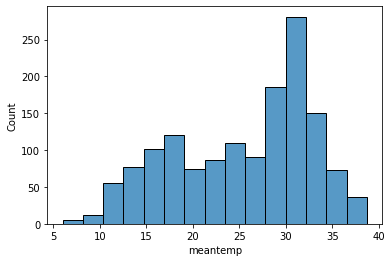

In [6]:
import seaborn as sb
import requests
import io

sb.histplot(data=weather_dataset['meantemp'])

Focusing a little bit more in the variable of *meantemp* which will be the main variable for the project we can see the data stored in that variable is asymmetric, and it's moving a little bit to the left, that means the majority of the data is contained in the values from 10 to 20's even though the most frequent data is the 30 or a little bit more, interesting.

<AxesSubplot:xlabel='humidity', ylabel='Count'>

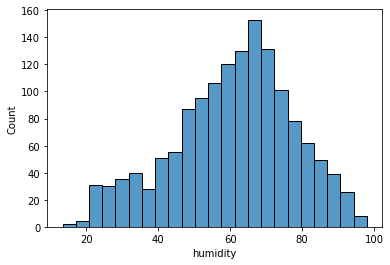

In [7]:
sb.histplot(data=weather_dataset['humidity'])

Now, analyzing the variable humdity we can see the distribution of the data follows a more normal form compared to the variable *meantemp*, we can see from here that the variance in the range of data seems to be lower and that the average of the data remains in between the values of 60s and 80s.

<AxesSubplot:xlabel='wind_speed', ylabel='Count'>

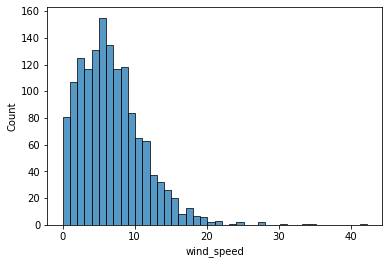

In [8]:
sb.histplot(data=weather_dataset['wind_speed'])

We can see that this variable doesn't follow a normal distributon of data, it is right-sided and theres is a little bit more of variance in the data as the range of values is higher, the average of this variables remains in between the values from 5 to 10.

<AxesSubplot:xlabel='meanpressure', ylabel='Count'>

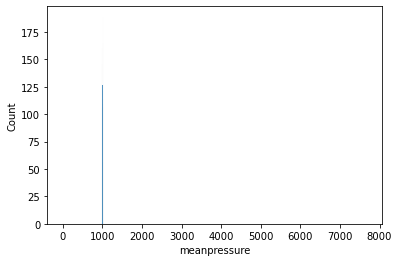

In [9]:
sb.histplot(data=weather_dataset['meanpressure'])

This data follows an unknown type of the distribution as the majority of the data is contained in the value of 1000, we might think that the range of the data is really big as there might be some atypical values along the data.

***We'll continue the analysis moving to the box plots.***

A *box plot* is basically a type of graph that displays the media, quartiles, range and atypical values. The box portion displays the middle 50% of the data, with a line at the median and the first and third quartiles. The whiskers of the plot extend to the minimum and maximum values, and any atypical value outside this range is marked, useful for identifying atypical values and for comparing distributions.

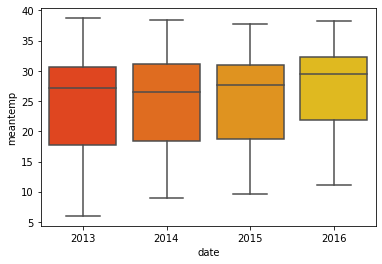

In [10]:
weather_dataset['date'] = weather_dataset.index.to_period('Y')
sb.boxplot(x=weather_dataset['date'],y = weather_dataset['meantemp'],palette='autumn');

For the *meantemp* variable we can see that the distribution of the data is not wide long, we don't have atypical values out of the range and from the first year to the last one we don't see a lot of variation, and between the first three years the variation is not easy to see, that means it's not a lot.

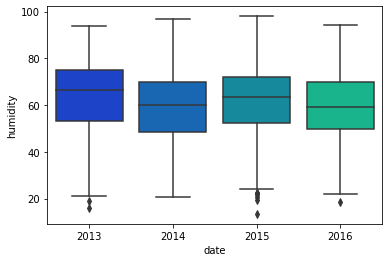

In [11]:
weather_dataset['date'] = weather_dataset.index.to_period('Y')
sb.boxplot(x=weather_dataset['date'],y = weather_dataset['humidity'],palette='winter');

Now, moving to the variable *humidity* we can see there is not a long of variation between the years, speaking about the distributuion of the data, we can see some atypical values in the years 2013, 2015, and 2016 that represents days that the humidity was completely out of the normal boundaries.

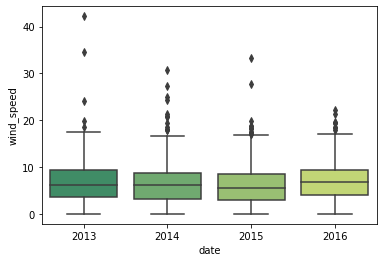

In [12]:
weather_dataset['date'] = weather_dataset.index.to_period('Y')
sb.boxplot(x=weather_dataset['date'],y = weather_dataset['wind_speed'],palette='summer');

We can see there is no much variation in the distribution of the data between the years, but we can see there is a great number of atypical values, which will lead the distributions go wider and also this means that some days in these years the speed of the wind was out of the normal boundaries, which could lead us to another analysis if this is related to global warming.

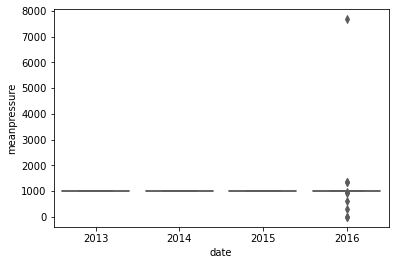

In [13]:
weather_dataset['date'] = weather_dataset.index.to_period('Y')
sb.boxplot(x=weather_dataset['date'],y = weather_dataset['meanpressure'],palette='spring');

For this variable the analysis could seem a little bit weird as all the data contained for all years is in the value of 1000, but we can also see there are a lot of atypical values in the last year, could lead to move all the data and have the presentation like this, we can conclude from here that in the year 2016 there were a lot of days where the pressure along the day was completely out of the normal boundaries.

***Now we move to the frequency tables analysis***

These tables are used to display the frequency of occurrences of different values in a particular dataset. They are a useful tool for summarizing data and can be used to analyze the distribution of a dataset. Frequency tables can also be used to identify correlations between variables, as well as to identify trends and patterns in the data.

In [14]:
weather_dataset['meantemp'].value_counts()

31.00    18
30.00    15
32.12    15
30.50    14
30.75    14
         ..
15.56     1
18.27     1
17.71     1
29.59     1
15.05     1
Name: meantemp, Length: 604, dtype: int64

In this table for the variable we can see the top 5 values that are present in the data, which comes from the values 30 to 32, which can lead us to think that the normal temperature of that place is warm.

In [15]:
weather_dataset['humidity'].value_counts()

65.50    9
65.75    8
67.62    7
63.88    7
67.00    7
        ..
75.12    1
52.06    1
92.38    1
38.62    1
89.67    1
Name: humidity, Length: 887, dtype: int64

For the humidity we can also see the 5 most frequent values, for the values we can see we might think that the place where the data is coming from might be a really warm and calid place as the main values for humidity follow also a high range.

In [16]:
weather_dataset['wind_speed'].value_counts()

0.00     25
0.92     24
2.55     22
5.56     20
1.85     20
         ..
33.33     1
16.89     1
14.01     1
14.35     1
7.32      1
Name: wind_speed, Length: 542, dtype: int64

For the speed of the wind we might be able to conclude that this place is calm related to the intensity of the wind, they don't present strong values in the most frequent values.

In [17]:
weather_dataset['meanpressure'].value_counts()

1017.00    13
1007.00    12
998.00     12
1016.00    12
1003.25    12
           ..
1001.83     1
1000.25     1
1000.28     1
999.75      1
1016.10     1
Name: meanpressure, Length: 613, dtype: int64

For the pressure we can see the most frequent values remain really close to each other, which can also makes us ask ourselves, why there might be a huge range of values in this variable if the majority is remaining in a close range.

**Now we'll be moving to the analysis with scatterplots and correlations**

Scatterplots are graphical representations of two variables that display the relationship between them. The dots in the plot represent individual data points, and the overall pattern of these points can be used to identify correlations between the two variables.

A correlation is a measure of how strongly related two variables are, and can range from a perfect negative correlation (i.e. as one variable increases, the other decreases) to a perfect positive correlation (i.e. as one variable increases, the other increases).

***4 variables scatterplot***

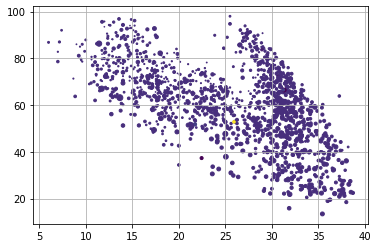

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.scatter(weather_dataset['meantemp'], weather_dataset['humidity'],weather_dataset['wind_speed'],
            weather_dataset['meanpressure'])
plt.grid()
#plt.xlabel('Google')
#plt.ylabel('Amazon');

We can see visually that there is no correlation among all the 4 variables, as the data or dots are wide spread and don't follow a linear form decreasing or increasing. So the value of one variable will not affect the others.

As later in the analysis we'll be focusing on the *meantemp* variable we only made the comparison of that individual variable with the rest.

***2 variables Scatterplot and Pearson Correlation value (meantemp vs humidity)***

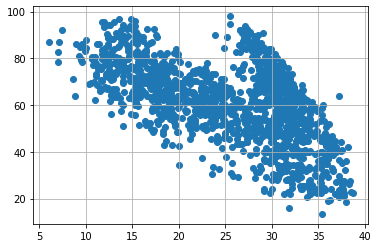

In [19]:
plt.scatter(weather_dataset['meantemp'], weather_dataset['humidity'])
plt.grid()

In [20]:
x = weather_dataset['meantemp']
y = weather_dataset['humidity']

def correlation(x,y): 
  A = np.sum((x-np.mean(x))*(y-np.mean(y)))
  B = np.sum((x-np.mean(x))**2) *np.sum((y-np.mean(y))**2)
  corr = A/(B)**0.5
  return(corr)

A = correlation(x,y)
print('Correlation value is:',A)

Correlation value is: -0.570502269906586


Following the scatterplot and the correlation value we can see there is not a strong or present correlation between these variables, the correlation is following a negative correlationship but the value is not strong so these variables will not affect each other.

***2 variables Scatterplot and Pearson Correlation value (meantemp vs wind_speed)***

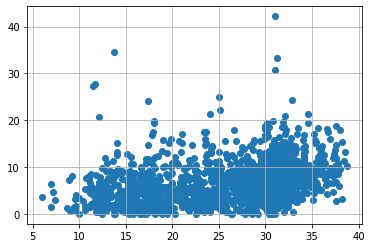

In [21]:
plt.scatter(weather_dataset['meantemp'], weather_dataset['wind_speed'])
plt.grid()

In [22]:
x = weather_dataset['meantemp']
y = weather_dataset['wind_speed']

def correlation(x,y): 
  A = np.sum((x-np.mean(x))*(y-np.mean(y)))
  B = np.sum((x-np.mean(x))**2) *np.sum((y-np.mean(y))**2)
  corr = A/(B)**0.5
  return(corr)

A = correlation(x,y)
print('Correlation value is:',A)

Correlation value is: 0.3049937931329548


Following the scatterplot and the correlation value we can see there is not a strong or present correlation between these variables, the correlation is following a positive correlationship but the value is really weak so these variables will not affect each other.

***2 variables Scatterplot and Pearson Correlation value (meantemp vs meanpressure)***

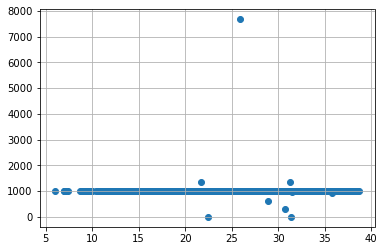

In [23]:
plt.scatter(weather_dataset['meantemp'], weather_dataset['meanpressure'])
plt.grid()

In [24]:
x = weather_dataset['meantemp']
y = weather_dataset['meanpressure']

def correlation(x,y): 
  A = np.sum((x-np.mean(x))*(y-np.mean(y)))
  B = np.sum((x-np.mean(x))**2) *np.sum((y-np.mean(y))**2)
  corr = A/(B)**0.5
  return(corr)

A = correlation(x,y)
print('Correlation value is:',A)

Correlation value is: -0.038845988037117404


Following the scatterplot and the correlation value we can see there is not a strong or present correlation between these variables, the correlation is following a negative correlationship but the value is extremely weal so these variable will not affect each other.

***We'll continue the analysis moving to the time series graphs.***

Time series graphs are graphical representations of data points collected over a period of time. They are used to analyze and visualize trends in data over time. Time series graphs can be used to identify seasonal patterns and trends, as well as to identify correlations between variables. They can also be used to identify outliers or anomalous data points.

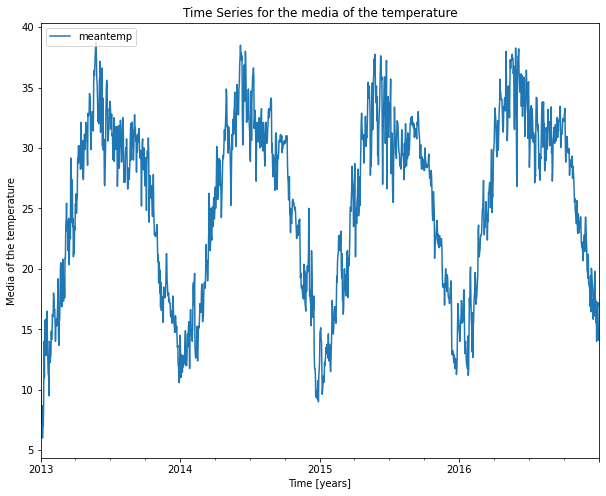

In [25]:
plot = weather_dataset['meantemp'].plot(figsize=(10,8))

y = weather_dataset['meantemp']
weather_dataset['date'] = weather_dataset.index.to_period('Y')
x = weather_dataset['date']

plt.title("Time Series for the media of the temperature")
plt.xlabel("Time [years]")
plt.ylabel("Media of the temperature");

plt.legend(frameon=True, loc='upper left');

This time series for the variable meantemp looks really interesting as it looks like it follows a pattern or seasonal trend, all the lines follow a uniform behavior every time the year starts and ends, so we might think for the next years it will be the same or similar behavior.

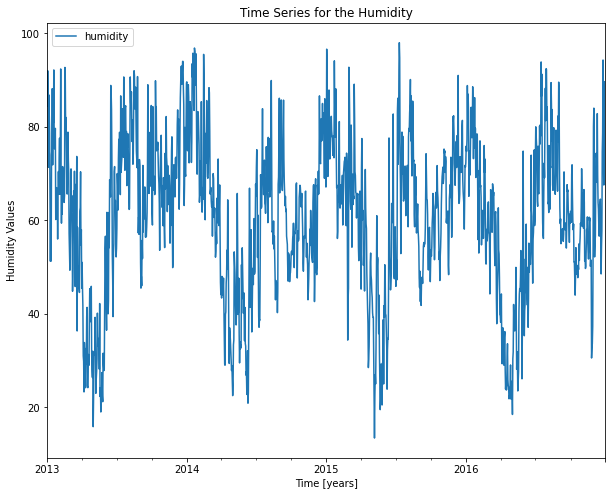

In [6]:
plot = weather_dataset['humidity'].plot(figsize=(10,8))

y = weather_dataset['meantemp']
weather_dataset['date'] = weather_dataset.index.to_period('Y')
x = weather_dataset['date']

plt.title("Time Series for the Humidity")
plt.xlabel("Time [years]")
plt.ylabel("Humidity Values");

plt.legend(frameon=True, loc='upper left');

This time series has a more crazy behavior as the data is spreading all along the range and is not quite following a specific behavior or trend.

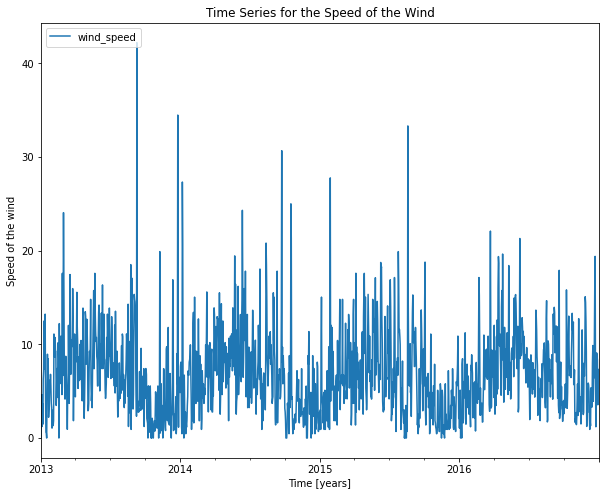

In [8]:
plot = weather_dataset['wind_speed'].plot(figsize=(10,8))

y = weather_dataset['wind_speed']
weather_dataset['date'] = weather_dataset.index.to_period('Y')
x = weather_dataset['date']

plt.title("Time Series for the Speed of the Wind")
plt.xlabel("Time [years]")
plt.ylabel("Speed of the wind");

plt.legend(frameon=True, loc='upper left');

This graph follows a more trend behavior, we can see it also kind of increases and decreases in the same form every year, we might think just visualizing it that it can have a pattern.

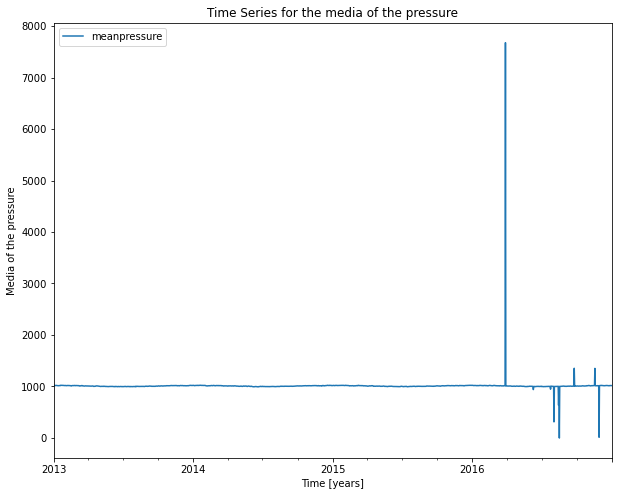

In [26]:
plot = weather_dataset['meanpressure'].plot(figsize=(10,8))

y = weather_dataset['meanpressure']
weather_dataset['date'] = weather_dataset.index.to_period('Y')
x = weather_dataset['date']

plt.title("Time Series for the media of the pressure")
plt.xlabel("Time [years]")
plt.ylabel("Media of the pressure");

plt.legend(frameon=True, loc='upper left');

Now, we can see finally what happened with the values that made the range of data go wider, in 2016 there's a really strange behavior that broke the linear constant form of this variable.

# Describing the time series patterns (visually and numerically) #

In [27]:
import statsmodels.api as sm
import sklearn 
from scipy import stats,signal
from sklearn.linear_model import LinearRegression
from datetime import datetime
from statsmodels.tsa.exponential_smoothing.ets import ETSModel 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

In this part we'll be checking the stationary of the variables, if we need differencing and also if they have trends.

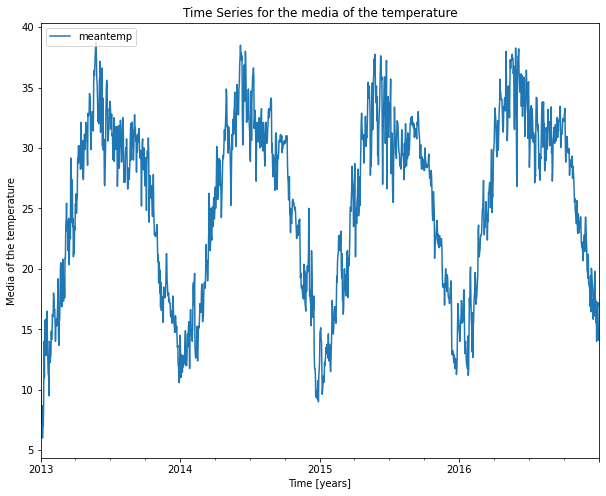

In [28]:
plot = weather_dataset['meantemp'].plot(figsize=(10,8))

y = weather_dataset['meantemp']
weather_dataset['date'] = weather_dataset.index.to_period('Y')
x = weather_dataset['date']

plt.title("Time Series for the media of the temperature")
plt.xlabel("Time [years]")
plt.ylabel("Media of the temperature");

plt.legend(frameon=True, loc='upper left');

Analyzing back again the time series for the variable *meantemp* we still can conclude it follows a specific trend, pattern or type of behavior, and this also makes sense because we are talking about the seasons of a year where the weather is changing but should be the same for the next season at the same point in time.

**Checking Stationarity** 
In order to check for the **stationarity of a time series**, different operations and statistical tests can be done, in particular:
- evaluating rolling statistics (generally mean and standard deviation);
- ACF plot: for a stationary time series the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly;
- Unit root tests: these are statistical hypothesis tests of stationarity that are designed for determining whether differencing is required. ADF (Augmented Dickey-Fuller) and KPSS (Kwiatkowski-Phillips-Schmidt-Shin) tests are the main ones. 

***Evaluating Rolling Statistics***

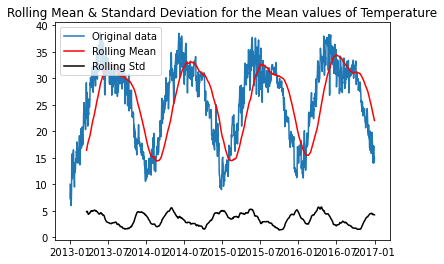

In [29]:
weather_meantemp = weather_dataset['meantemp']

rolling_mean = weather_meantemp.rolling(80).mean()
rolling_std = weather_meantemp.rolling(80).std()
plt.plot(weather_meantemp, label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for the Mean values of Temperature');

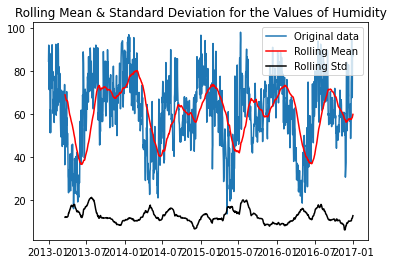

In [9]:
weather_humidity = weather_dataset['humidity']

rolling_mean = weather_humidity.rolling(80).mean()
rolling_std = weather_humidity.rolling(80).std()
plt.plot(weather_humidity, label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for the Values of Humidity');

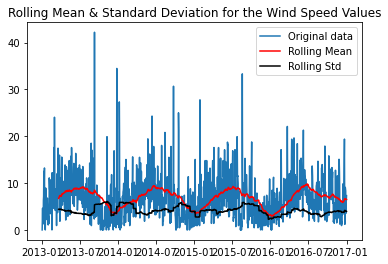

In [10]:
weather_wind_speed = weather_dataset['wind_speed']

rolling_mean = weather_wind_speed.rolling(80).mean()
rolling_std = weather_wind_speed.rolling(80).std()
plt.plot(weather_wind_speed, label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for the Wind Speed Values');

The first three graphs follow a same behavior every year related to standard deviation and also the mean, so we can say it hints to be stationary so now we follow with the next steps to test this.

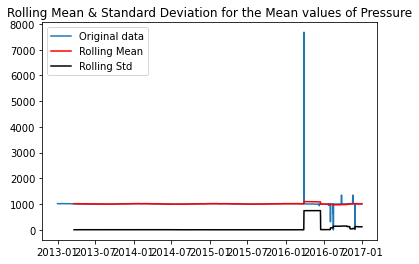

In [11]:
weather_meanpressure = weather_dataset['meanpressure']

rolling_mean = weather_meanpressure.rolling(80).mean()
rolling_std = weather_meanpressure.rolling(80).std()
plt.plot(weather_meanpressure, label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for the Mean values of Pressure');

***ACF Plot***

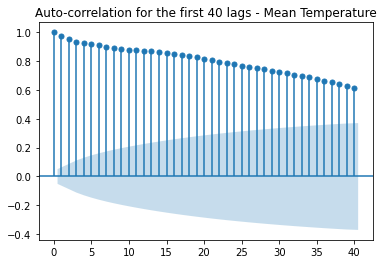

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(weather_meantemp, lags=40, title='Auto-correlation for the first 40 lags - Mean Temperature');

This type of behavior is not fitable to follow a stationary form, so we have to implement the differencing method to check if it goes more stationary and if not we apply another differencing.

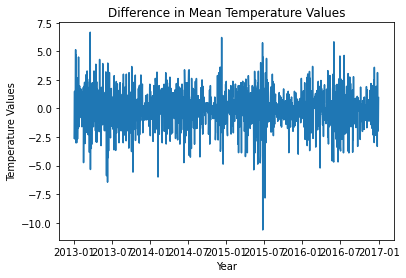

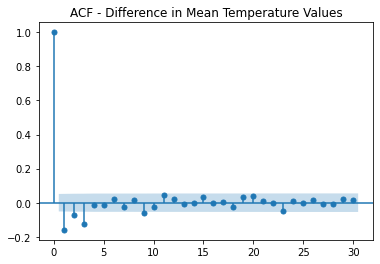

In [31]:
data = weather_dataset

series_meantemp = data['meantemp']

data['difference1'] = series_meantemp.diff()
data.dropna(inplace=True)
plt.plot(data.index, data['difference1'])
plt.title('Difference in Mean Temperature Values')
plt.xlabel('Year')
plt.ylabel('Temperature Values');

plot_acf(data['difference1'], lags=30,
         title='ACF - Difference in Mean Temperature Values');

The differencing method of ACF went smooth as we visually look at the graph we can see that now the behavior follows a stationary form, now we'll move to the the unit root tests that will help us define if our variables follow a stationary form to continue with the forecast.

***Unit Root Tests***

*Augmented Dickey-Fuller*

The **Augmented Dickey-Fuller** (ADF) test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. ADF uses an autoregressive model and optimizes an information criterion across multiple different lag values. The null hypothesis (H0) of the test is that the time series can be represented by a unit root, that it is not stationary. The alternative hypothesis is that the time series is stationary.

- Null Hypothesis (H0):  time series has a unit root, and it is non-stationary. \\
- Alternative Hypothesis (H1): time series does not have a unit root, meaning it is stationary. 

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. \\
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary. 

The main outputs from the `adfuller` test in Python are: 1) test statistic; 2) p-value; 3) number of lags used; 4) number of observations used for the ADF regression and calculation of the critical values; 5) critical values for the test statistic at the 1%, 5%, and 10% levels; 6) the maximized information criterion among AIC, BIC and t-stat.

In [32]:
def adfuller_test(data):
  adf_test = adfuller(data,autolag='AIC') 
  print('ADF Statistic:', adf_test[0])
  print('p-value: ', adf_test[1])
  print('Critical Values:')
  for key, value in adf_test[4].items():
      print('\t%s: %.3f' % (key, value))
  if adf_test[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is non-stationary')


print('ADF on Mean Temperature')
adfuller_test(weather_dataset['meantemp'])
print('--------------------------------------')
print('ADF on Mean Temperature Difference')
adfuller_test(data['difference1'])
print('--------------------------------------')
print('ADF on Humidity')
adfuller_test(weather_dataset['humidity'])
print('--------------------------------------')
print('ADF on Wind Speed')
adfuller_test(weather_dataset['wind_speed'])
print('--------------------------------------')
print('ADF on Mean Pressure')
adfuller_test(weather_dataset['meanpressure'])

ADF on Mean Temperature
ADF Statistic: -2.1653659020428346
p-value:  0.2190548315725897
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
We cannot reject the null hypothesis (H0) --> data is non-stationary
--------------------------------------
ADF on Mean Temperature Difference
ADF Statistic: -16.518346280200333
p-value:  2.075270139807268e-29
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
We can reject the null hypothesis (H0) --> data is stationary
--------------------------------------
ADF on Humidity
ADF Statistic: -3.7257020888079087
p-value:  0.0037658172927268734
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
We can reject the null hypothesis (H0) --> data is stationary
--------------------------------------
ADF on Wind Speed
ADF Statistic: -3.831721377814825
p-value:  0.002598937761681022
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
We can reject the null hypothesis (H0) --> data is stationary
--------------------------------------
ADF on Mean Press

*KPSS Tests*

Conversely, the **KPSS** tests for the null hypothesis that the series is stationary around a deterministic trend (i.e., trend-stationary). Therefore, if the p-value of the test statistic is below the threshold, this means we can reject this hypothesis and the series is not trend stationary. A p-value higher than the threshold will lead us to accept this hypothesis and conclude that the series is trend-stationary. This is different from other unit roots tests, as the presence of a unit root is not the null hypothesis but the alternative. Thus, the interpretation of the resulting p-value is the opposite compared to ADF.

- Null Hypothesis (H0): time series is trend stationary.
- Alternative Hypothesis (H1): time series is not trend stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data is not trend stationary.
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data is trend stationary.

The main outputs from the Python `kpss` function are: 1) the KPSS test statistic; 2) the p-value of the test; 3) the number of lags used by the test; 4) the critical values at 10%, 5%, 2.5% and 1%. 

In [33]:
def kpss_test(data):
  kpss_out = kpss(data,regression='c', nlags='auto', store=True) 
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on Mean Temperature')
kpss_test(weather_dataset['meantemp'])
print('--------------------------------------')
print('KPSS on Mean Temperature difference')
kpss_test(data['difference1'])
print('--------------------------------------')
print('KPSS on Humidity')
kpss_test(weather_dataset['humidity'])
print('--------------------------------------')
print('KPSS on Wind Speed')
kpss_test(weather_dataset['wind_speed'])
print('--------------------------------------')
print('KPSS on Mean Pressure')
kpss_test(weather_dataset['meanpressure'])

KPSS on Mean Temperature
KPSS Statistic: 0.18903429360170967
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Mean Temperature difference
KPSS Statistic: 0.14705668389478815
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Humidity
KPSS Statistic: 0.0929682154940711
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Wind Speed
KPSS Statistic: 0.14097605625699572
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Mean Pressure
KPSS Statistic: 0.09235371341522036
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


In [58]:
def kpss_test(data):
  kpss_out = kpss(data,regression='ct', nlags='auto', store=True) 
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on Mean Temperature')
kpss_test(weather_dataset['meantemp'])
print('--------------------------------------')
print('KPSS on Mean Temperature difference')
kpss_test(data['difference1'])
print('--------------------------------------')
print('KPSS on Humidity')
kpss_test(weather_dataset['humidity'])
print('--------------------------------------')
print('KPSS on Wind Speed')
kpss_test(weather_dataset['wind_speed'])
print('--------------------------------------')
print('KPSS on Mean Pressure')
kpss_test(weather_dataset['meanpressure'])

KPSS on Mean Temperature
KPSS Statistic: 0.09015610128577022
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Mean Temperature difference
KPSS Statistic: 0.05914589752446135
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Humidity
KPSS Statistic: 0.06260291230685691
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Wind Speed
KPSS Statistic: 0.12017785780650415
p-value:  0.09781878183980712
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Mean Pressure
KPSS Statistic: 0.0515463914155489
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


<u>Important Note</u>: These two tests are not interchangeble, considering their different assumptions/null hypotheses. It is always better to apply both of them, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

- **Case 1**: Both tests conclude that the series is not stationary - The series is not stationary

- **Case 2**: Both tests conclude that the series is stationary - The series is stationary

- **Case 3**: KPSS indicates stationarity and ADF indicates non-stationarity -> The series is trend stationary: it requires differencing or other transformations to remove the trend. The resulting series is checked for stationarity

- **Case 4:** KPSS indicates non-stationarity and ADF indicates stationarity ->  The series is difference stationary: it requires differencing. The differenced series is checked for stationarity.


Verifying to which case our time series belongs to is an essential step before applying ARIMA models as well as for understanding the differencing order. Differencing represents one of the simplest methods for detrending a time series. An advantage of differencing over detrending is that no parameters are estimated in the differences operation. However, this might represent also a disadvantage if we want to utilize an estimate of the trend at some point. However, if the main goal is force data to stationarity, differencing may be the most appropriate.

# Focusing on *meantemp* (temperature as dependent variable), building the most appropriate model(s) to forecast the data for the specified period. In particular, using as test data those contained in the corresponding csv file. Evaluating the model performance using different metrics. Visualising the results with appropriate graphs.

In [12]:
import statsmodels.api as sm
import sklearn 
from scipy import stats,signal
from sklearn.linear_model import LinearRegression
from datetime import datetime
from statsmodels.tsa.exponential_smoothing.ets import ETSModel 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

## **1.1. Box-Jenkins method** 
When dealing with the family of ARIMA models, it is important to remember the **Box-Jenkins methodology** proposed by George Box and Gwilym Jenkins in their seminal book entitled *Time Series Analysis: Forecasting and Control* (1970) to find the best fit of a time series model. The approach starts with the assumption that the process that generated the time series can be approximated using a model from the ARIMA family. Starting from the available time series and use separate train/test sets, the process includes the following steps:

**1.   Identification:** as initial step, it is important to determine if our time series is seasonal and find the seasonal period, verify the stationarity and eventually apply appropriate transformations to reduce the variance. When data have a strong seasonal pattern, seasonal differencing should be used as first step. Once stationarity and seasonality have been addressed, the next step is to identify the order (p,d,q) of ARIMA models by relying on ACF/PACF plots and on appropriate criteria for model selection, such as AIC, AICc and BIC; 

**2.   Model estimation:**  Once the model order has been identied, the model parameter are estimated generally using maximum likelihood estimation;

**3.   Model diagnostic:** After fitting the model, conduct goodness-of-fit checks to ensure the model describes the data adequately. In particular the residuals are taken and it is assessed whether they are white noise and they are normally distributed. ACF plot of the residuals can help in this respect, along with statistics as the Ljung-Box test.
If the assumed model is appropriate for the data, the residuals should satisfy these assumptions. If they are not satisfied, we have to go back to the model identification step and try to develop a better model; 

**4.   Forecasting:** If the model is good, we can finally perform the forecasting analyses in our separate test set, and perform all the performance evalutations (e.g., MAE, MSE, MAPE, R2).

# SARIMA Model

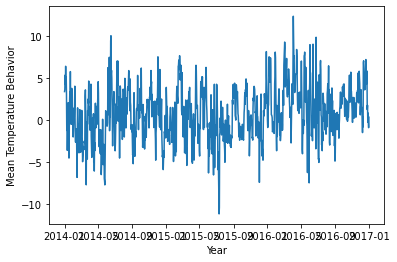

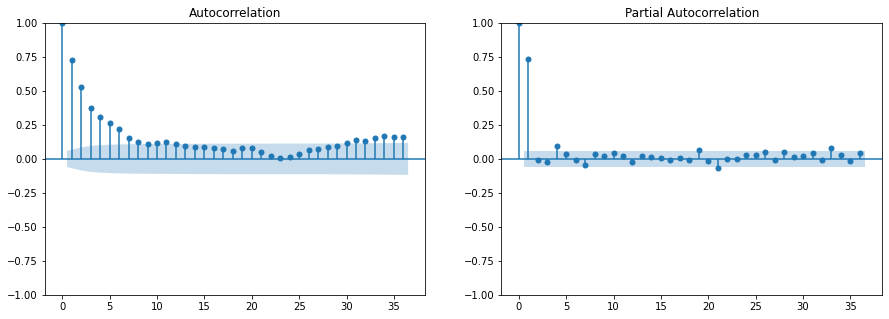

In [13]:
data_train = weather_dataset['meantemp']

data_diff_seas_train = data_train.diff(365)
data_diff_seas_train.dropna(inplace=True)
plt.plot(data_diff_seas_train)
plt.xlabel('Year')
plt.ylabel('Mean Temperature Behavior');

fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_acf(data_diff_seas_train, lags=36, ax=ax[0]);
plot_pacf(data_diff_seas_train, lags=36, ax=ax[1]);

We make a second differencing as the data is still not following a stationary form and the values for p, d, and q cannot be obtained from here.

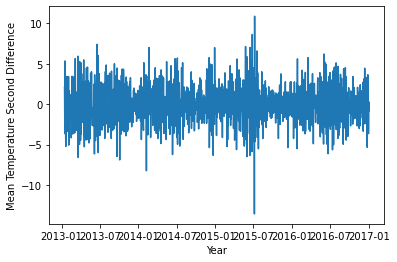

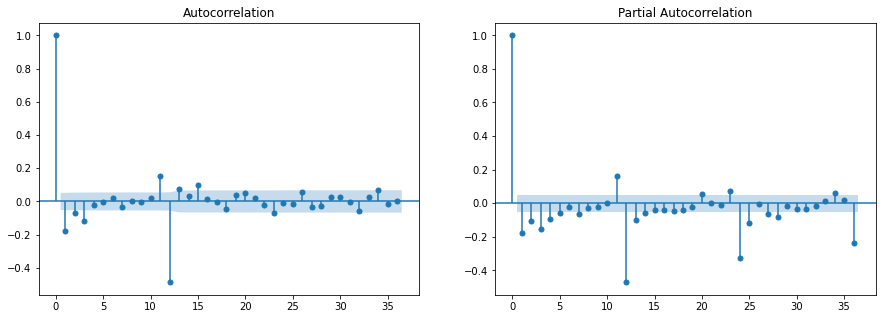

In [52]:
data_diff_seas_first_train = data_diff_seas_train.diff()
data_diff_seas_first_train.dropna(inplace=True)
plt.plot(data_diff_seas_first_train)
plt.xlabel('Year')
plt.ylabel('Mean Temperature Second Difference');

fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_acf(data_diff_seas_first_train, lags=36, ax=ax[0]);
plot_pacf(data_diff_seas_first_train, lags=36, ax=ax[1]);

                                      SARIMAX Results                                       
Dep. Variable:                             meantemp   No. Observations:                 1461
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -2743.678
Date:                              Thu, 09 Feb 2023   AIC                           5495.357
Time:                                      16:47:10   BIC                           5516.427
Sample:                                  01-01-2013   HQIC                          5503.224
                                       - 12-31-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2373      0.022    -10.988      0.000      -0.280      -0.195
ma.L2         -0.16

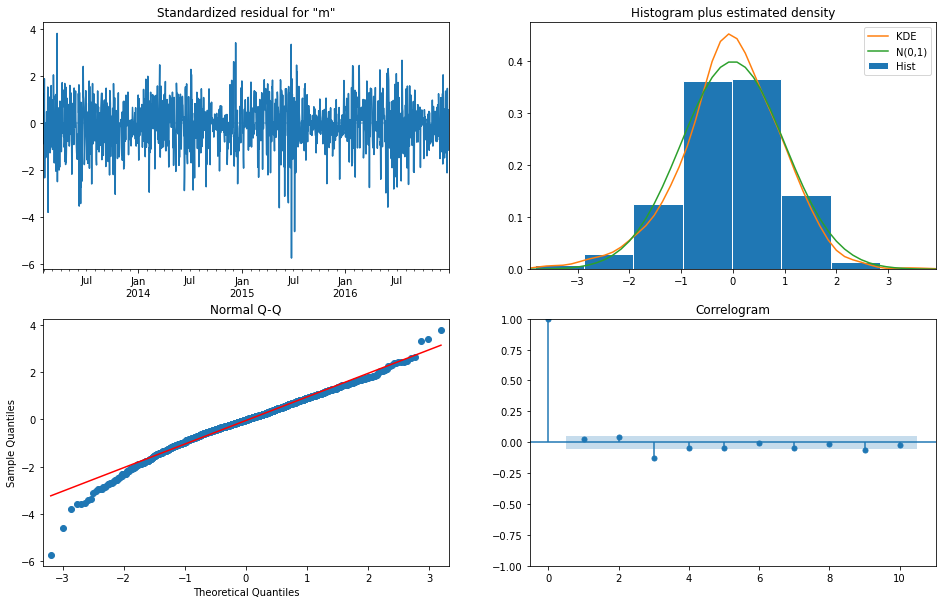

In [15]:
[p,d,q] = [0,1,2]
[P,D,Q,S] = [0,1,1,12]
model_SARIMA = SARIMAX(weather_dataset['meantemp'], 
                       order=(p,d,q), 
                       seasonal_order=(P,D,Q,S), 
                       enforce_stationarity=False,
                       enforce_invertibility=False) # trend = str{‘n’,’c’,’t’,’ct’}
result_SARIMA = model_SARIMA.fit()

# Verify the residuals
print(result_SARIMA.summary()) 
result_SARIMA.plot_diagnostics(figsize=(16, 10));

In [40]:
data_test = pd.read_csv("Weather ForecastingTest.csv",engine='python',index_col='date',parse_dates=['date'])

In [41]:
data_test

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-03-27,29.500000,38.625000,13.650000,1009.500000
2017-03-28,29.888889,40.666667,8.844444,1009.000000
2017-03-29,31.000000,34.500000,13.200000,1007.125000


In [44]:
data_test = data_test[['meantemp']]

Getting the forecast.

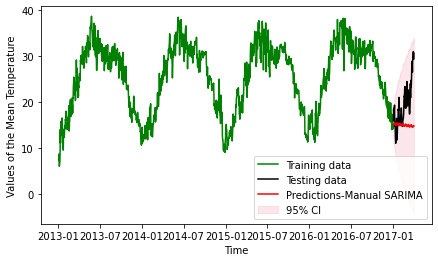

In [56]:
model_SARIMA = result_SARIMA.get_prediction(start=data_test.index[0], end=data_test.index[-1])
df_manual = model_SARIMA.summary_frame()

plt.figure(figsize=(7, 4)) 
plt.plot(weather_dataset['meantemp'], color='green',label='Training data')
plt.plot(data_test, color='black', label='Testing data')
plt.plot(df_manual['mean'], color='red', label='Predictions-Manual SARIMA')
plt.fill_between(df_manual.index, df_manual['mean_ci_lower'], df_manual['mean_ci_upper'], alpha=.1, color='crimson', label='95% CI')
plt.xlabel('Time')
plt.ylabel('Values of the Mean Temperature')
plt.legend();

Visually we can see that the forecast didn't go as planned, as the prediction of the manual SARIMA process is not following properly the data test, and not even in the direction of the lines, so it's not good to take into considerarion this result for our forecast. Now we'll check on the error values to see how fit or bad was the forecast.

In [57]:
# Model performance 
print('Manual SARIMA model')
print('MAE :', mean_absolute_error(data_test,df_manual['mean']))
print('RMSE:', np.sqrt(mean_squared_error(data_test,df_manual['mean'])))
print('MAPE :', 100*mean_absolute_percentage_error(data_test,df_manual['mean']))

Manual SARIMA model
MAE : 4.861321950951467
RMSE: 6.4887465321470845
MAPE : 22.146080134911138


In conclusion it is not a big value of error but still the prediction doesn't look really fit to the test data, therefore we should try another type of model to see if the prediction goes smoother.

# ARIMA Model

In [59]:
! pip install pmdarima
from pmdarima.arima import auto_arima

arima_model =  auto_arima(data_train,start_p=0, d=0, start_q=0, 
                          max_p=6, max_q=6, m=1, seasonal=False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = False,
                          random_state=20,information_criterion='aicc')

 ARIMA(0,0,0)(0,0,0)[0]             : AICC=13719.857, Time=0.07 sec


 ARIMA(0,0,1)(0,0,0)[0]             : AICC=11852.757, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AICC=10382.463, Time=0.28 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AICC=9378.575, Time=0.38 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AICC=8626.398, Time=0.99 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AICC=8161.758, Time=1.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AICC=inf, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AICC=5592.472, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AICC=5563.405, Time=0.11 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AICC=5531.225, Time=0.13 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AICC=5531.700, Time=0.22 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AICC=inf, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AICC=5534.093, Time=0.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AICC=5535.748, Time=0.20 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AICC=5531.148, Time=0.26 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AICC=inf, Time=0.09 sec
 ARIMA(3

In [63]:
from statsmodels.tsa.arima.model import ARIMA

mod_AR_data = ARIMA(data_train, order=(2,0,3)).fit() 
 
print(mod_AR_data.summary())
print('Estimated Coefficients:', mod_AR_data.params)

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1460
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -2757.741
Date:                Wed, 08 Feb 2023   AIC                           5529.482
Time:                        01:30:45   BIC                           5566.485
Sample:                    01-02-2013   HQIC                          5543.286
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5723      3.551      6.357      0.000      15.613      29.532
ar.L1          1.2229      0.150      8.147      0.000       0.929       1.517
ar.L2         -0.2261      0.149     -1.514      0.1

In [64]:
LB_AR_data = acorr_ljungbox(mod_AR_data.resid, lags=[14], return_df=True) 
print('LB p-value for residuals', float(LB_AR_data['lb_pvalue']))
print('----------------------------')

dw_google = durbin_watson(mod_AR_data.resid)
print('DW statistic for residuals:', dw_google)
print('----------------------------')

jb_statistic = stats.jarque_bera(mod_AR_data.resid)
print('JB p-value for residuals:', jb_statistic.pvalue)

LB p-value for residuals 0.3063734644360414
----------------------------
DW statistic for residuals: 1.9415083864031049
----------------------------
JB p-value for residuals: 0.0


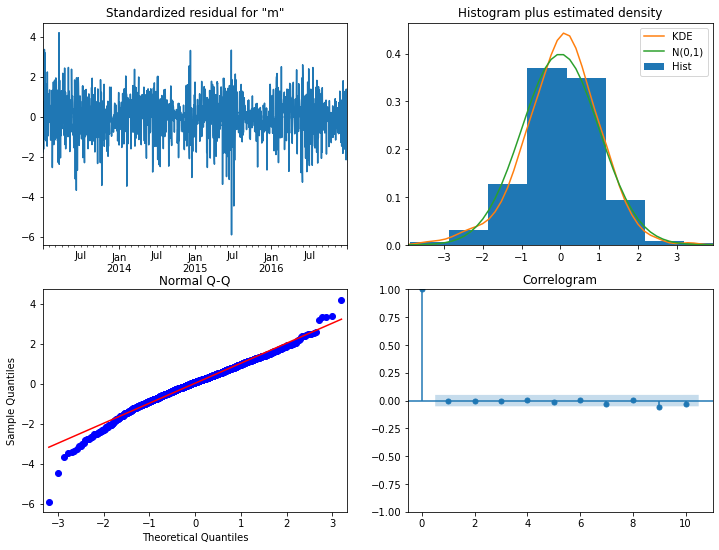

In [65]:
mod_AR_data.plot_diagnostics(figsize=(12,9));

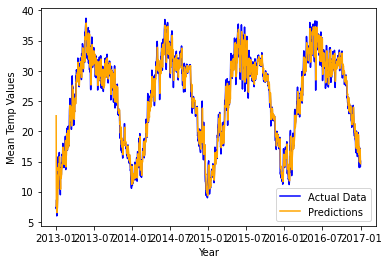

In [66]:
plt.plot(data_train, color='blue',label='Actual Data')
plt.plot(mod_AR_data.fittedvalues, color='orange', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Mean Temp Values')
plt.legend();

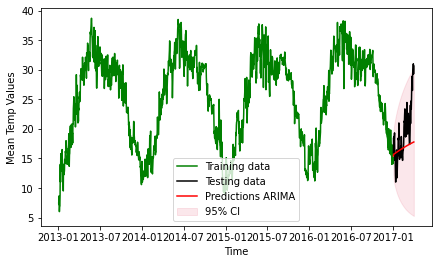

In [67]:
model_ARIMA = mod_AR_data.get_prediction(start=data_test.index[0], end=data_test.index[-1])
df_manual_data = model_ARIMA.summary_frame()

plt.figure(figsize=(7, 4)) 
plt.plot(data_train, color='green',label='Training data')
plt.plot(data_test, color='black', label='Testing data')
plt.plot(df_manual_data['mean'], color='red', label='Predictions ARIMA')
plt.fill_between(df_manual_data.index, df_manual_data['mean_ci_lower'], df_manual_data['mean_ci_upper'], alpha=.1, color='crimson', label='95% CI')
plt.xlabel('Time')
plt.ylabel('Mean Temp Values')
plt.legend();

In [68]:
print('Manual ARIMA model')
print('MAE :', mean_absolute_error(data_test,df_manual_data['mean']))
print('RMSE:', np.sqrt(mean_squared_error(data_test,df_manual_data['mean'])))
print('MAPE :', 100*mean_absolute_percentage_error(data_test,df_manual_data['mean']))

Manual ARIMA model
MAE : 3.54430350291088
RMSE: 4.894288097458605
MAPE : 16.49811984732058
